<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#RISE-Settings" data-toc-modified-id="RISE-Settings-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>RISE Settings</a></span></li></ul></li><li><span><a href="#$g_m/I_D$-Method" data-toc-modified-id="$g_m/I_D$-Method-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>$g_m/I_D$ Method</a></span></li><li><span><a href="#PyGMID" data-toc-modified-id="PyGMID-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PyGMID</a></span><ul class="toc-item"><li><span><a href="#Look-Up-Functionality" data-toc-modified-id="Look-Up-Functionality-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Look Up Functionality</a></span></li></ul></li><li><span><a href="#Important-Ratios-for-Design" data-toc-modified-id="Important-Ratios-for-Design-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Important Ratios for Design</a></span></li><li><span><a href="#Design-Example:-Common-Source-With-Active-Load" data-toc-modified-id="Design-Example:-Common-Source-With-Active-Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Design Example: Common Source With Active Load</a></span><ul class="toc-item"><li><span><a href="#Sizing-M1-Unloaded" data-toc-modified-id="Sizing-M1-Unloaded-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Sizing M1 Unloaded</a></span></li><li><span><a href="#Visualing-With-Lookup-Commands" data-toc-modified-id="Visualing-With-Lookup-Commands-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Visualing With Lookup Commands</a></span></li><li><span><a href="#Maximum-Gain" data-toc-modified-id="Maximum-Gain-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Maximum Gain</a></span></li><li><span><a href="#Maximum-Efficiency" data-toc-modified-id="Maximum-Efficiency-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Maximum Efficiency</a></span></li><li><span><a href="#SPICE-Simulation" data-toc-modified-id="SPICE-Simulation-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>SPICE Simulation</a></span><ul class="toc-item"><li><span><a href="#Maximum-Gain" data-toc-modified-id="Maximum-Gain-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Maximum Gain</a></span></li><li><span><a href="#Maximum-Efficiency" data-toc-modified-id="Maximum-Efficiency-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Maximum Efficiency</a></span></li></ul></li><li><span><a href="#Active-Load-Design:-Maximum-Gain" data-toc-modified-id="Active-Load-Design:-Maximum-Gain-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Active Load Design: Maximum Gain</a></span><ul class="toc-item"><li><span><a href="#Sizing-the-PMOS:-Maximum-Gain" data-toc-modified-id="Sizing-the-PMOS:-Maximum-Gain-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Sizing the PMOS: Maximum Gain</a></span></li></ul></li><li><span><a href="#Output-Swing-Analysis:-Balancing-Gain-and-Dynamic-Range" data-toc-modified-id="Output-Swing-Analysis:-Balancing-Gain-and-Dynamic-Range-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Output Swing Analysis: Balancing Gain and Dynamic Range</a></span></li><li><span><a href="#Moderate-Inversion" data-toc-modified-id="Moderate-Inversion-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Moderate Inversion</a></span></li><li><span><a href="#Moderate-Inversion-Design" data-toc-modified-id="Moderate-Inversion-Design-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Moderate Inversion Design</a></span></li></ul></li><li><span><a href="#$g_m/I_D$-Design-Flow" data-toc-modified-id="$g_m/I_D$-Design-Flow-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>$g_m/I_D$ Design Flow</a></span></li><li><span><a href="#$g_m/I_D$-Limitations" data-toc-modified-id="$g_m/I_D$-Limitations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>$g_m/I_D$ Limitations</a></span><ul class="toc-item"><li><span><a href="#Interpolation-Error" data-toc-modified-id="Interpolation-Error-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Interpolation Error</a></span></li></ul></li></ul></div>

In [9]:
# Import libraries
!pip install altair
#!pip install -r requirements.txt
import numpy as np
from IPython.display import IFrame

import matplotlib.pyplot as plt

import altair as alt
#from vega_datasets import data
#mtcars = data.cars()

## Set Altair default size

def theme_fm(*args, **kwargs):
    return {'height': 220,
            'width' : 220,
            'config': {'style': {'circle': {'size': 400},
                                'point': {'size': 30},
                                'square': {'size': 400},
                                },
                       'legend': {'symbolSize': 20, 'titleFontSize': 20, 'labelFontSize': 20}, 
                       'axis': {'titleFontSize': 20, 'labelFontSize': 20}},
            }

alt.themes.register('theme_fm', theme_fm)
alt.themes.enable('theme_fm')

print('You are ready to proceed!')

You are ready to proceed!


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pygmid import Lookup as lk
from time import time
# custom
mu = '\u03BC'

# setup mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['font.size'] = 12
mpl.rcParams.update({"axes.grid" : True})

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

### RISE Settings

In [4]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
        "rise",
        {
            "theme": "simple",
            "transition": "fade",
            "start_slideshow_at": "selected",
            "autolaunch": True,
            "width": "100%",
            "height": "100%",
            "header": "",
            "footer":"",
            "scroll": True,
            "enable_chalkboard": True,
            "slideNumber": True,
            "center": False,
            "controlsLayout": "edges",
            "slideNumber": True,
            "hash": True,
        }
    )

<div class="row">
  <div class="col-md-8" markdown="1">
      <h1></h1>
  </div>
  <div class="col-md-4" markdown="1">
      <img height="600px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

<br></br>
<br></br>


# $g_m/I_D$ Design with Python


## *PyGMID and Common Source Design* <a class="tocSkip">

Dr. Daniel O'Hare and Cian O'Donnell


<div class="row">
  <div class="col-md-9" markdown="1">
      <h2>Overview<a class="tocSkip"></h2>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

- `PyGMID` : $g_m/I_D$ design in python
- Lookup functionality, lookup VGS
- *Width independent* ratios for design
- Sizing with $I_D/W$
- Common Source Amplifier Design Example
    


<div class="row">
  <div class="col-md-9" markdown="1">
      <h2>$g_m/I_D$ Method</h2>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

<div class="row">
  <div class="col-md-6" markdown="1">
      <img height="400px" class="center-block" src="img/NMOS-sweep.png">
  </div>
  <div class="col-md-6" markdown="1">
      <img height="400px" class="center-block" src="img/PMOS-sweep.png">
  </div>
</div>

- 4-dimensional sweep data: $L$, $V_{GS}$, $V_{DS}$, $V_{SB}$
- Large and small signal operating points logged for later retrieval
- Unit sized width: e.g 2 by $2 [\mu m]$ fingers
- For `gpdk090` data, unit with is $1 [\mu m]$

<div class="row">
  <div class="col-md-9" markdown="1">
      <h2>PyGMID</h2>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

In [5]:
# import lookup class
from pygmid import Lookup as lk
# load mos data into lookup objects

NCH = lk('sky130nfet.mat')
PCH = lk('sky130pfet.mat')

<div class="row">
  <div class="col-md-9" markdown="1">
      <h3>Look Up Functionality</h3>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

1) **Simple lookup** of parameters for a given ($L$, $V_{GS}$, $V_{DS}$, $V_{SB}$)

In [6]:
VGSs = np.array([0.4,0.5,0.6])
VDSs = np.array([0.4,0.5,0.6,0.7])
gm = NCH.look_up('GM', VGS=VGSs, VDS=VDSs, VSB=0, L=0.1)
print(f"Transconductance at Query Points [{mu}S]")
print(gm*1e6)

Transconductance at Query Points [μS]
[[0.06438532 0.07698586 0.08996461 0.10332744]
 [0.48525829 0.59408254 0.70503992 0.81809033]
 [3.95247971 4.86299939 5.77830464 6.69771907]]


- Use `Lookup` object dictionary properties to access sweep points

In [7]:
# available L data points
Ls = NCH['L']
print(f"L: {Ls}")
print(f"Default L is Lmin: {min(Ls)} [{mu}m]\n")

# available VDS points
VDSs = NCH['VDS']
print(f"VDS: start={VDSs[0]},step={VDSs[1]-VDSs[0]},stop={VDSs[-1]}")
print(f"Default VDS is VDD/2: {max(VDSs)/2}\n")

# available VSB points
VSBs = NCH['VSB']
print(f"VSB: start={VSBs[0]},step={(VSBs[1]-VSBs[0])},stop={VSBs[-1]}")

# available VGS points
VGSs = NCH['VGS']
print(f"VGS: start={VGSs[0]},step={(VGSs[1]-VGSs[0])},stop={VGSs[-1]}")


L: [ 0.15  0.17  0.19  0.21  0.23  0.25  0.27  0.29  0.31  0.33  0.35  0.37
  0.39  0.41  0.43  0.45  0.47  0.49  0.6   0.7   0.8   0.9   1.    1.1
  1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    3.    4.    5.
  6.    7.    8.    9.   10.  ]
Default L is Lmin: 0.15 [μm]

VDS: start=0.0,step=0.025,stop=1.8
Default VDS is VDD/2: 0.9

VSB: start=0.0,step=0.1,stop=1.0
VGS: start=0.0,step=0.025,stop=1.8


2) **Ratio lookup** of arbitrary ratios for a given ($L$, $V_{GS}$, $V_{DS}$, $V_{SB}$)

- As an example, query the intrinsic gain $g_m/g_{ds}$ against $V_{GS}$ and $L$

In [8]:
# example query points to check transistor intrinsic gain
VGSs = [0.2,0.3,0.4,0.5,0.6]
Ls = [0.15,0.2]

A = NCH.look_up('GM_GDS', VGS=VGSs,L=Ls)
print(A)

[[23.11340078 24.47451739 25.79265468 26.48354562 25.18333282]
 [39.97342666 41.59210321 42.59019145 40.87122352 35.05899614]]


3) **Ratio lookup** of arbitrary ratios against another ratio

- As an example, query the intrinsic gain $g_m/g_{ds}$ against $g_m/I_D$

In [33]:
# query lengths
Ls = [0.15, 0.2]
GM_IDs = [5, 6, 7, 8, 9, 10]

A = NCH.look_up('GM_GDS', GM_ID=GM_IDs, L=Ls)
print(A)

[[14.45502521 15.42877132 16.25384094 16.95886317 17.56651405 18.09906792]
 [25.68999771 27.67425566 29.25023326 30.49476826 31.45156512 32.15391519]]


4) **Companion lookup VGS**: find VGS for a given $g_m / I_D$, terminal voltages and gate length.

- Usually used as a final step before simulation
- Assign $g_m / I_D$, size transistor appropriately and find required bias with `look_upVGS`

In [34]:
# choose inversion level, length and VDS (VBS default)
GM_ID = 10
L = 0.15
VDS = 0.5

VGS = NCH.look_upVGS(GM_ID=GM_ID, L=L, VDS=VDS)
print(f"Required VGS for given inversion level: {VGS:.4f} [V]")

Required VGS for given inversion level: 0.8739 [V]


<div class="row">
  <div class="col-md-9" markdown="1">
      <h2>Exercise<a class="tocSkip"></h2>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>
<br></br>


- Use the NMOS `look_up` function to find the drain current density (`ID_W`) when `GM_ID=10`. `L`, `VDS` and `VSB` are default 
- If $I_{bias}$ is $1 [\mu A]$, size the transistor width

<div class="row">
  <div class="col-md-9" markdown="1">
      <h2>Important Ratios for Design</h2>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

Useful *width independent* design ratios that can be used with the lookup functions are:

- $\left(g_m/I_D\right)$ : transconductance efficiency
- $\left(I_D/W\right)$ : drain current density
- $\left(g_m/g_{ds}\right)$ : intrinsic gain
- $\left(g_m/C_{gg}\right)$ : transit frequency

<img height="400px" class="center" src="img/MOSFET.png">

<img height="400px" class="center" src="img/width-independence.png">

<div class="row">
  <div class="col-md-9" markdown="1">
      <h2>Design Example: Common Source With Active Load</h2>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

<img height="400px" class="center" src="img/common-source.png">

**Design Specification**


| Parameter    | Specification |
| -------- | ------- |
| $V_{out}$  | 0.6 V    |
| $v_{OUT}$  | 0.8 V p-to-p    |
| $V_{DD}$ | 1.2 V     |
| $C_{L}$    | 1 pF    |
| $f_{u}$    | 1 GHz    |


_Find_:

1) $I_D$, W and L of $M_{1,2}$, $V_{BIAS,N}$ and $V_{BIAS,P}$
2) Maximum gain
3) Minimum power

<div class="row">
  <div class="col-md-9" markdown="1">
      <h3>Sizing M1 Unloaded</h3>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

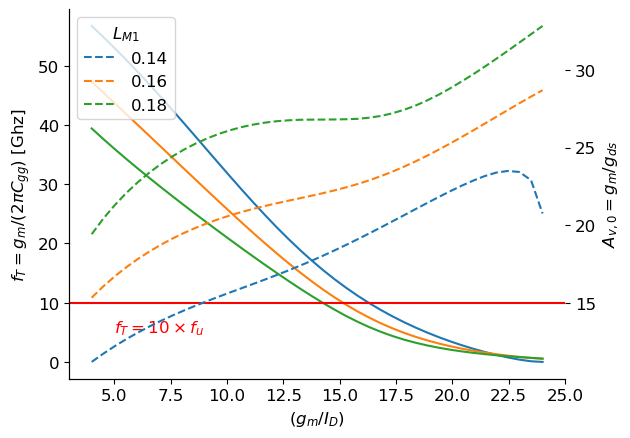

In [27]:
# pick design values for L and GM_ID
# VSB is default = 0, VDS is default, VDD/2 = 0.6
Ls = np.array([0.14,0.16, 0.18])
GM_IDs = np.linspace(4, 24, num=40)
fu = 1 # GHz

ft = 1/(2*np.pi) * NCH.look_up('GM_CGG', GM_ID=GM_IDs, L=Ls)
Av = NCH.look_up('GM_GDS', GM_ID=GM_IDs, L=Ls)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

labels = [str(i) for i in Ls]
ax1.plot(GM_IDs, ft.T / (1e9))
ax1.set_xlabel(r"$(g_m/I_D)$")
ax1.set_ylabel(r"$f_T=g_m/(2 \pi C_{gg})$ [Ghz]")
 
ax1.text(5,10*fu-5,r'$f_T=10\times f_u$',color='r')
ax1.grid()
ax2.plot(GM_IDs, Av.T,linestyle='dashed')
ax2.set_ylabel(r"$A_{v,0}=g_m/g_{ds}$")
ax2.grid()
ax2.legend(labels,title=r"$L_{M1}$")
plt.show()

<div class="row">
  <div class="col-md-9" markdown="1">
      <h3>Visualing With Lookup Commands</h3>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

In [12]:
#             start stop step
Ls = np.arange(0.14, 0.36, 0.02)
fu = 1 # GHz
fT = 10 * fu * 1e9
# default VSB and VDS

gmIDmax = NCH.look_up('GM_ID', GM_CGG=2*np.pi*fT, L=Ls)
plt.plot(gmIDmax, Ls.T*1e3, linestyle='--', marker='o')
plt.ylabel(r"L [nm]")
plt.xlabel(r"$(g_m/I_D)_{MAX}$")
plt.show()

UnboundLocalError: local variable 'x_right' referenced before assignment

In [11]:
#             start stop step
Ls = np.arange(0.14, 0.36, 0.02)
# default VSB and VDS
Av = np.diag(NCH.look_up('GM_GDS', GM_ID=gmIDmax, L=Ls))
plt.plot(gmIDmax, Av, linestyle='--', marker='o')
plt.xlabel(r"$(g_m/I_D)_{MAX}$ [S/A]")
plt.ylabel(r"$(g_m/g_{ds})$")
plt.title("Open Drain Low Frequency Gain")
plt.text(10,50, r'S.I.',color='r',fontsize=25)
plt.text(11,18, r'M.I.',color='r',fontsize=25)
plt.text(17.5,14, r'W.I.',color='r',fontsize=25)
plt.show()

NameError: name 'gmIDmax' is not defined

<div class="row">
  <div class="col-md-9" markdown="1">
      <h3>Maximum Gain</h3>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

Looking to maximise gain without considering power consumption

- $A_{0,max}\approx 20$
- $(g_m/I_D)_{0}\approx 5$
- $L_0 \approx 280 [nm] $

Now we can check drain current density, size transistor and lookup required gate bias


In [25]:
# calculate required gm (GBW consideration)
# noise specification may require larger gm
fu = 1e9
CL = 1e-12 # load cap 
gm = 2*np.pi*fu*CL
GM_ID0 = 5
L0 = 0.28 # un

# calculate required drain current from transistor inversion level (gm/ID)
ID0 = gm / GM_ID0

# size transitor from drain current density
ID_W = NCH.look_up('ID_W', GM_ID=GM_ID0, L=L0)
W0 = ID0 / ID_W

In [26]:
# print calculations ...
print(f"gm requirement: {gm*1e3} [mS]")
print(f"Required current: {ID0*1e6} [{mu}A]")
print(f"L x W : {L0} [{mu}n] x {W0} [{mu}n]")

# now check bias point
VGS0 = NCH.look_upVGS(GM_ID=GM_ID0,L=L0)
print(f"VGS: {VGS0} [V]")

gm requirement: 6.283185307179586 [mS]
Required current: 1256.6370614359173 [μA]
L x W : 0.28 [μn] x 26.182453964631346 [μn]
VGS: 1.0190387401429613 [V]


<div class="row">
  <div class="col-md-9" markdown="1">
      <h3>Maximum Efficiency</h3>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

Looking to maximise efficiency without sizing consideration

- $(g_m/I_D)_{0,max}\approx 20$
- $L_0 \approx 125 [nm] $

In [20]:
# calculate required gm (GBW consideration)
# noise specification may require larger gm
fu = 1e9
CL = 1e-12 # load cap 
gm = 2*np.pi*fu*CL
GM_ID0 = 20
L0 = 0.125 # un

# calculate required drain current from transistor inversion level (gm/ID)
ID0 = gm / GM_ID0

# size transitor from drain current density
ID_W = NCH.look_up('ID_W', GM_ID=GM_ID0, L=L0)
W0 = ID0 / ID_W

In [21]:
# print calculations ...
print(f"gm requirement: {gm*1e3} [mS]")
print(f"Required current: {ID0*1e6} [{mu}A]")
print(f"L x W : {L0} [{mu}n] x {W0} [{mu}n]")

# now check bias point
VGS0 = NCH.look_upVGS(GM_ID=GM_ID0,L=L0)
print(f"VGS: {VGS0} [V]")

gm requirement: 6.283185307179586 [mS]
Required current: 314.1592653589793 [μA]
L x W : 0.125 [μn] x 244.96189866006813 [μn]
VGS: 0.6564620901228571 [V]


<div class="row">
  <div class="col-md-9" markdown="1">
      <h3>SPICE Simulation</h3>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

Both designs are simulated in Cadence

<h4 style="text-align: center;">Maximum Gain</h4>

| Parameter    | Value |
| -------- | ------- |
| $g_m$  | 6.3 mS    |
| $g_{ds}$ | 309.16 $\mu S$     |
| $C_{gg}$    | 99 fF    |
| $V_{DS}$    | 0.66 V    |
| $g_{m}/g_{ds}$    | 20.38    |
| $g_{m}/I_{D}$    | 5.05 S/A   |
| $(g_{m}/C_{gg})$    | 10.1$\times 2\pi$ Grad/s  |

<h4 style="text-align: center;">Maximum Efficiency</h4>

| Parameter    | Value |
| -------- | ------- |
| $g_m$  | 6.3 mS    |
| $g_{ds}$ | 676.4 $\mu S$     |
| $C_{gg}$    | 92.5 fF    |
| $V_{DS}$    | 0.645 V    |
| $g_{m}/g_{ds}$    | 9.31    |
| $g_{m}/I_{D}$    | 20.06 S/A   |
| $(g_{m}/C_{gg})$    | 10.9$\times 2\pi$ Grad/s  |

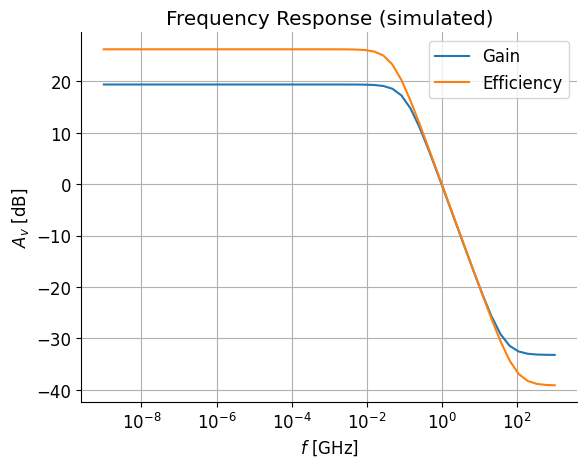

fu (efficiency) : 970 MHz
fu (gain) : 991 MHz


In [21]:
array = np.loadtxt('data/DAY1_CS_SIM.csv', skiprows=1, delimiter=',')
f = AvdB20_EFF = array[:,0]
AvdB20_EFF = array[:,1]
plt.semilogx(f*1e-9, AvdB20_EFF)
f = AvdB20_EFF = array[:,2]
AvdB20_GAIN = array[:,3]
plt.semilogx(f*1e-9, AvdB20_GAIN)
plt.ylabel(r"$A_v$ [dB]")
plt.xlabel(r"$f$ [GHz]")
plt.legend(['Gain', 'Efficiency'])
plt.title("Frequency Response (simulated)")
plt.show()

print(f"fu (efficiency) : 970 MHz")
print(f"fu (gain) : 991 MHz")

Need to account for parasitic capacitance as seen from drain

$\omega_u = g_m/(C_L + C_{dd})$

Can use estimate, or lookup tables

<div class="row">
  <div class="col-md-9" markdown="1">
      <h3>Active Load Design: Maximum Gain</h3>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

<img height="400px" class="center" src="img/CS_load_labelled.png">

Finite $g_{ds}$ of the PMOS load degrades $A_{v,0}$ of the gain stage

$A_{v,0} = \frac{g_{m,1}}{g_{ds,1} + g_{ds,2}} = \frac{g_{m,1}/I_{D,1}}{g_{ds,1}/I_{D,1} + g_{ds,2}/I_{D,1}}$

Design is relatively constrained. $I_D$ is fixed by Q-point of M1. Need to optimise $g_{ds,2}$

In [46]:
# pick a range of gm/ID to sweep
GM_IDs = np.linspace(4,15,num=6)
Ls = [0.2, 0.4, 0.6] # un
GDS_ID = PCH.look_up("GDS_ID", GM_ID=GM_IDs,L=Ls)
print(GDS_ID)

[[0.23251332 0.27131037 0.32212261 0.37934696 0.44433908 0.52880351]
 [0.09795375 0.09757827 0.10439284 0.1141233  0.12662133 0.14433044]
 [0.0569186  0.04791225 0.04525418 0.0444187  0.04449738 0.045455  ]]


<div class="row">
  <div class="col-md-9" markdown="1">
      <h4>Sizing the PMOS: Maximum Gain</h4>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

- $(g_{m,1}/I_{D,1})=5$
- $(g_{ds,1}/I_{D,1})\approx 0.25$

To optimise gain, PMOS load should be in strong inversion ($g_m/I_D=5$)

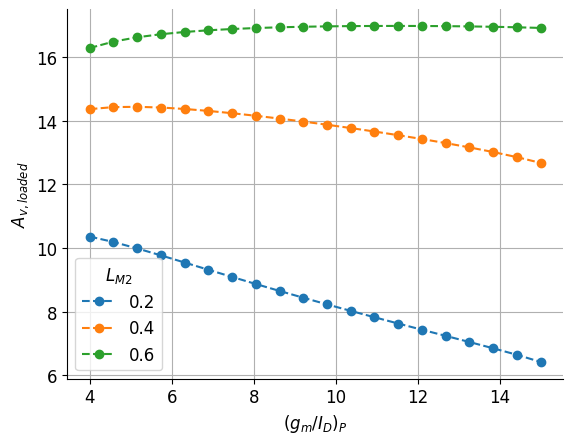

In [42]:
# device ID is fixed from before
ID0 = 1.256e-3
Avloaded = 5/(0.25 + GDS_ID)

plt.plot(GM_IDs, Avloaded.T, linestyle='--', marker='o')
plt.ylabel(r"$A_{v,loaded}$")
plt.xlabel(r"$(g_m/I_D)_{P}$")
labels = [str(i) for i in Ls]
plt.legend(labels,title=r"$L_{M2}$")
plt.show()

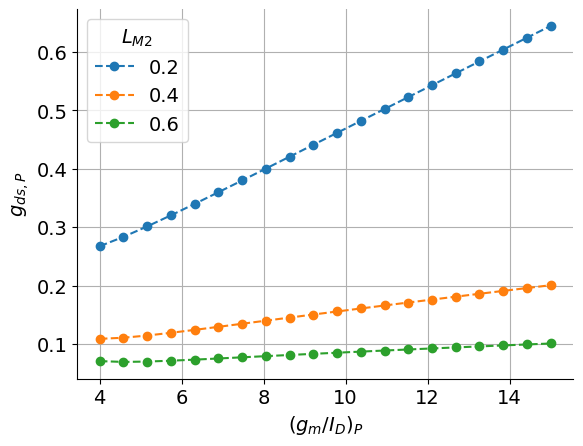

In [20]:
gdsP = GDS_ID * ID0



plt.plot(GM_IDs, GDS_ID.T, linestyle='--', marker='o')
plt.ylabel(r"$g_{ds,P}$")
plt.xlabel(r"$(g_m/I_D)_{P}$")
labels = [str(i) for i in Ls]
plt.legend(labels,title=r"$L_{M2}$")
plt.show()

<div class="row">
  <div class="col-md-9" markdown="1">
      <h3>Output Swing Analysis: Balancing Gain and Dynamic Range</h3>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

- For strong to moderate inversion, $V_{OV}=2/(g_m/I_D)$ is a valid first order model

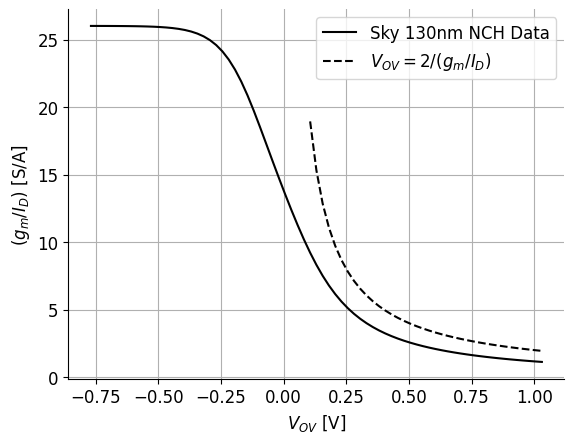

In [56]:
VGS = NCH['VGS']
# look up GMID for default VGS, VDS, VSB and L
GM_IDs = NCH.look_up("GM_ID")
VTs = NCH.look_up("VT")
plt.plot(VGS-VTs, GM_IDs,color='black')
# print(VGS-VTs)
plt.xlabel(r"$V_{OV}$ [V]")
plt.ylabel(r"$(g_m/I_D)$ [S/A]")

plt.plot((VGS-VTs)[35:], 2/(VGS-VTs)[35:], linestyle='--',color='black')
plt.legend([r"Sky 130nm NCH Data", r"$V_{OV}=2/(g_m/I_D)$"])
plt.show()

**Optimum Gain Design**

- NMOS device is in strong inversion ($g_m/I_D$=5): $V_{OV}=0.3$
- PMOS load is also strongly inverted: $V_{OV}=0.3$

Output is limited to a 0.6 V p-to-p swing. Specification requires 0.8 V p-to-p

**Increasing Dynamic Range**

To the detriment of gain, can moderately invert devices to increase output swing range

<div class="row">
  <div class="col-md-9" markdown="1">
      <h3>Moderate Inversion</h3>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

- Moderate inversion yields a good compromise between _power consumption_ / _size_

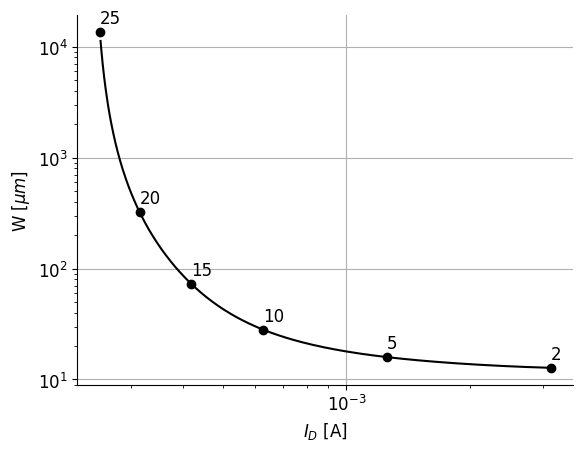

In [58]:
import numpy as np
from pygmid import Lookup as lk
import matplotlib.pyplot as plt
GBW = 1e9
CL = 1e-12
L = 0.1
gm = GBW*2*np.pi*CL
#NCH = lk('gpdk090/1v/90n1rvt.pkl')

GM_IDs = np.arange(2, 25, 0.1)
W = 1/(GM_IDs)*gm/NCH.look_up("ID_W", GM_ID=GM_IDs)
plt.loglog(1/(GM_IDs)*gm, W, color='black')
GM_IDs_coarse = np.array([2, 5, 10, 15, 20, 25])
W = 1/(GM_IDs_coarse)*gm/NCH.look_up("ID_W", GM_ID=GM_IDs_coarse)
x = 1/(GM_IDs_coarse)*gm
y = W
plt.scatter(x, y, color='black')
for i, txt in enumerate(GM_IDs_coarse):
    plt.annotate(str(txt), (x[i], y[i]*1.2))
plt.ylabel(r"W [$\mu m$]")
plt.xlabel(r'$I_D$ [A]')
plt.show()

<div class="row">
  <div class="col-md-9" markdown="1">
      <h3>Moderate Inversion Design</h3>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

- Assign $(g_m/I_D)=10$ for NMOS, $V_{OV}\approx 0.18 V$

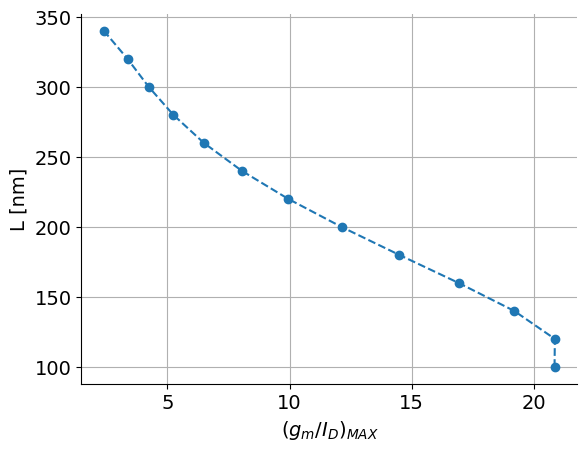

In [22]:
#             start stop step
Ls = np.arange(0.1, 0.36, 0.02)
fu = 1 # GHz
fT = 10 * fu * 1e9
# default VSB and VDS

gmIDmax = NCH.look_up('GM_ID', GM_CGG=2*np.pi*fT, L=Ls)
plt.plot(gmIDmax, Ls.T*1e3, linestyle='--', marker='o')
plt.ylabel(r"L [nm]")
plt.xlabel(r"$(g_m/I_D)_{MAX}$")
plt.show()

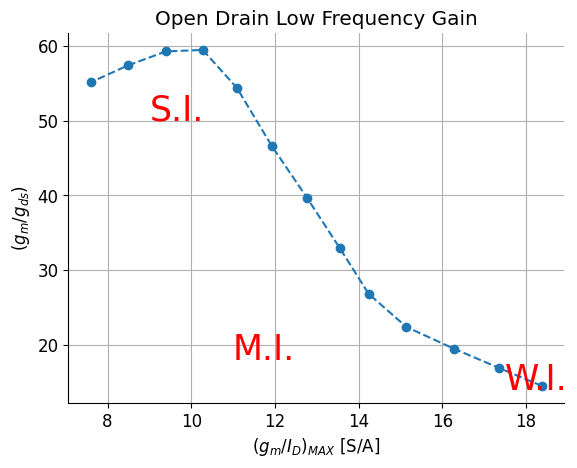

In [60]:
#             start stop step
Ls = np.arange(0.1, 0.36, 0.02)
# default VSB and VDS
Av = np.diag(NCH.look_up('GM_GDS', GM_ID=gmIDmax, L=Ls))
plt.plot(gmIDmax, Av, linestyle='--', marker='o')
plt.xlabel(r"$(g_m/I_D)_{MAX}$ [S/A]")
plt.ylabel(r"$(g_m/g_{ds})$")
plt.title("Open Drain Low Frequency Gain")
plt.text(9,50, r'S.I.',color='r',fontsize=25)
plt.text(11,18, r'M.I.',color='r',fontsize=25)
plt.text(17.5,14, r'W.I.',color='r',fontsize=25)
plt.show()

- $A_{0,max}\approx 17.5$
- $L_0 \approx 220 [nm] $

Now we can check drain current density, size transistor and lookup required gate bias

In [61]:
# calculate required gm (GBW consideration)
# noise specification may require larger gm
fu = 1e9
CL = 1e-12 # load cap 
gm = 2*np.pi*fu*CL
GM_ID0 = 10
L0 = 0.22 # un

# calculate required drain current from transistor inversion level (gm/ID)
ID0 = gm / GM_ID0

# size transitor from drain current density
ID_W = NCH.look_up('ID_W', GM_ID=GM_ID0, L=L0)
W0 = ID0 / ID_W

In [62]:
# print calculations ...
print(f"gm requirement: {gm*1e3:.4} [mS]")
print(f"Required current: {ID0*1e6:.4} [{mu}A]")
print(f"L x W : {L0} [{mu}n] x {W0:.4} [{mu}n]")

# now check bias point
VGS0 = NCH.look_upVGS(GM_ID=GM_ID0,L=L0)
print(f"VGS: {VGS0} [V]")

gm requirement: 6.283 [mS]
Required current: 628.3 [μA]
L x W : 0.22 [μn] x 39.73 [μn]
VGS: 0.8489891587857951 [V]


<div class="row">
  <div class="col-md-9" markdown="1">
      <h2>$g_m/I_D$ Design Flow</h2>
  </div>
  <div class="col-md-3" markdown="1">
      <img height="400px" class="center-block" src="img/mcci-big-logo.png">
  </div>
</div>

<img height="400px" class="center" src="img/OTA-design-flow.png">

<img src="img/mcci-big-logo.png" width="300" height="100" align="right"/>
<h2> <a class="tocSkip"></h2>    
    
<h1 align="center" style="font-size:500%;">Questions?<a class="tocSkip"></h1> 

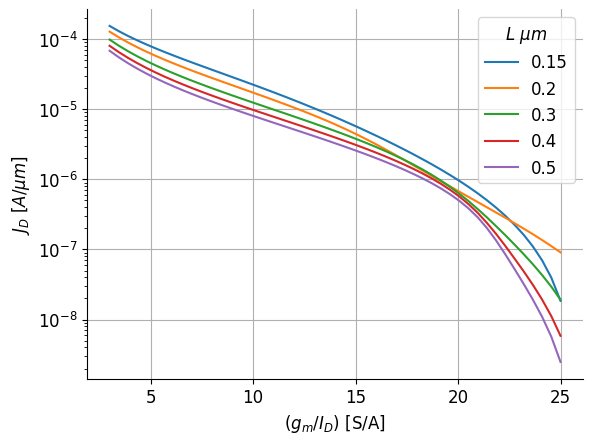

In [65]:
Ls = [0.15,0.2,0.3,0.4,0.5]
GM_IDs = np.linspace(3, 25,num=50)
ID_W = NCH.look_up('ID_W', GM_ID=GM_IDs, L=Ls)

plt.semilogy(GM_IDs, ID_W.T)
plt.xlabel(r"$(g_m/I_D)$ [S/A]")
plt.ylabel(r"$J_D$ [$A/\mu m$]")
labels = [str(i) for i in Ls]
plt.legend(labels,title=r"$L$ $\mu m$")
plt.show()

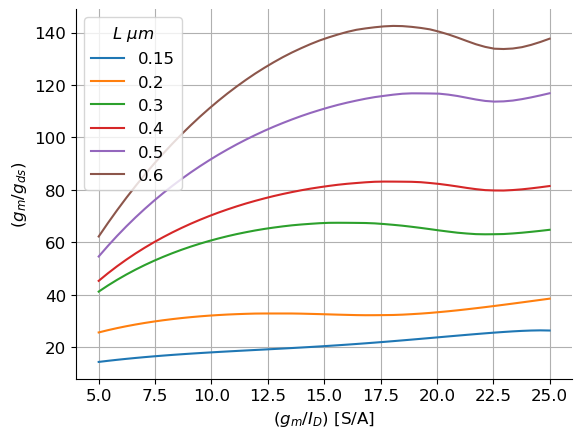

In [24]:
Ls = [0.15,0.2,0.3,0.4,0.5,0.6]
GM_IDs = np.linspace(5, 25,num=50)
ID_W = NCH.look_up('GM_GDS', GM_ID=GM_IDs, L=Ls)

plt.plot(GM_IDs, ID_W.T)
plt.xlabel(r"$(g_m/I_D)$ [S/A]")
plt.ylabel(r"$(g_m/g_{ds})$")
labels = [str(i) for i in Ls]
plt.legend(labels,title=r"$L$ $\mu m$")
plt.show()

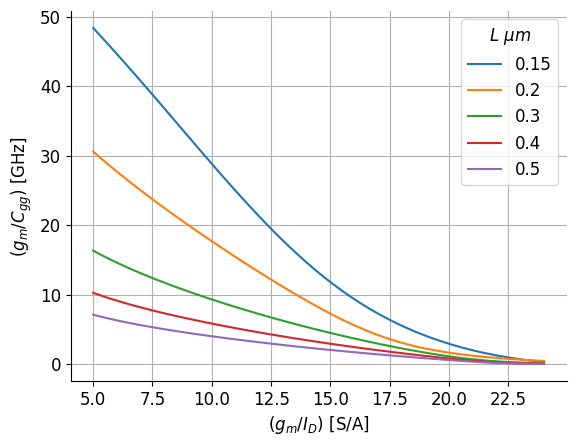

In [69]:
Ls = [0.15,0.2,0.3,0.4,0.5]
GM_IDs = np.linspace(5, 24,num=50)
GM_CGG = NCH.look_up('GM_CGG', GM_ID=GM_IDs, L=Ls)

plt.plot(GM_IDs, GM_CGG.T * 1e-9 /(2* np.pi))
plt.xlabel(r"$(g_m/I_D)$ [S/A]")
plt.ylabel(r"$(g_m/C_{gg})$ [GHz]")
labels = [str(i) for i in Ls]
plt.legend(labels,title=r"$L$ $\mu m$")
plt.show()

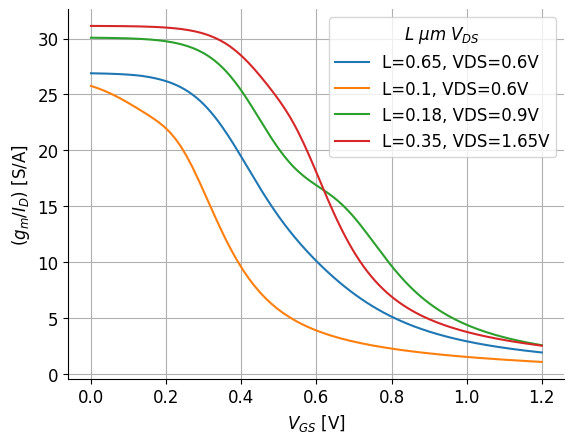

In [21]:
from pygmid import Lookup as lk

NCH65 = lk('../MOS DATA/TSMC65/65n12rvt.mat')
NCH90 = lk('./../gpdk090/1v/90n1rvt.pkl')
NCH180 = lk('../MOS DATA/XT180/RVT/180ne.pkl')
NCH350 = lk('../MOS DATA/AMS350/350nch.mat')
VGSs = NCH65['VGS']
plt.plot(VGSs, NCH65.look_up('GM_ID', VGS=VGSs))
plt.plot(VGSs, NCH90.look_up('GM_ID', VGS=VGSs))
plt.plot(VGSs, NCH180.look_up('GM_ID', VGS=VGSs))
plt.plot(VGSs, NCH350.look_up('GM_ID', VGS=VGSs))
plt.ylabel(r"$(g_m/I_D)$ [S/A]")
plt.xlabel(r"$V_{GS}$ [V]")
labels = ['L=0.65, VDS=0.6V', 'L=0.1, VDS=0.6V', 'L=0.18, VDS=0.9V', 'L=0.35, VDS=1.65V']
plt.legend(labels,title=r"$L$ $\mu m$ $V_{DS}$")
plt.show()